## Desafio 

In [23]:
# Importando arquivo csv e armazenando em variavel
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('C:/Users/Vitor/Downloads/googleplaystore.csv')

### Removendo linhas duplicadas

In [19]:
# Exibir a quantidade de linhas antes da remoção dos duplicados
print("Quantidade de linhas antes da remoção de duplicados:", df.shape[0])
# Removendo duplicatas com base na coluna 'App'
df = df.drop_duplicates(subset='App', keep='first')
# Exibindo a quantidade de linhas após a remoção dos duplicados
print("Quantidade de linhas após a remoção de duplicados:", df.shape[0])

Quantidade de linhas antes da remoção de duplicados: 10841
Quantidade de linhas após a remoção de duplicados: 9660


### Tabela com os Top 5 apps mais instalados

In [25]:
# Fazendo o tratamento da coluna Installs para pegar os dados corretos
top_5_apps = df['Installs'] = df['Installs'].str.replace('+', '').str.replace(',', '').replace('Free', 0).astype(float)
top_5_apps = df.nlargest(5, 'Installs')
print(top_5_apps[['App','Installs']])

                                          App      Installs
152                         Google Play Books  1.000000e+09
335  Messenger – Text and Video Chat for Free  1.000000e+09
336                        WhatsApp Messenger  1.000000e+09
338              Google Chrome: Fast & Secure  1.000000e+09
340                                     Gmail  1.000000e+09


### Graficos de barras dos Top 5 apps instalados

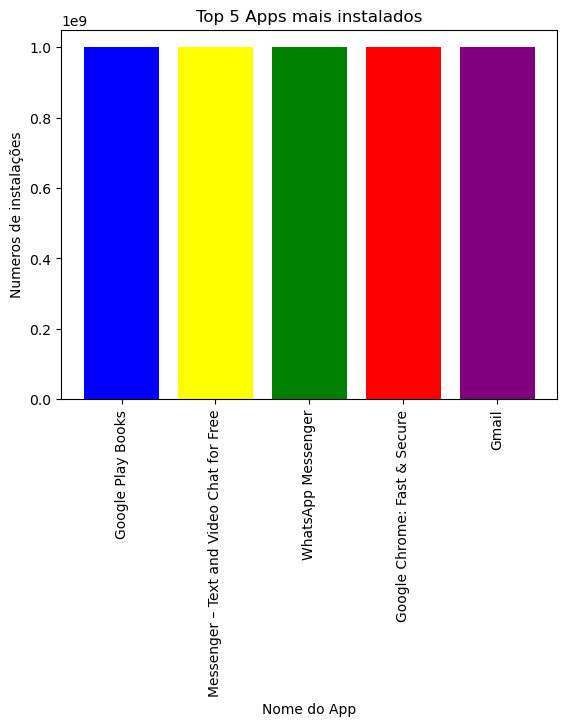

In [56]:
# Colocando cores diferentes em cada app
cores = ['blue', 'yellow', 'green', 'red', 'purple']
# Montando o grafico de barras
plt.bar(top_5_apps['App'], top_5_apps['Installs'], color = cores)
plt.xlabel('Nome do App')
plt.ylabel('Numeros de instalações')
plt.title('Top 5 Apps mais instalados')
plt.xticks(rotation = 90)
plt.savefig('grafico_top5_apps_instalados.pdf', format='pdf', bbox_inches='tight')
plt.show()

### Categorias presentes no Dataset

In [35]:
# Separando as Categorias de apps com um limite para ficar mais fácil de vizualizar no grafico
limite = 250
ct = df.groupby('Category')['Installs'].count().sort_values(ascending=False)
categorias_acima_limite = ct[ct >= limite]
categorias_abaixo_limite = ct[ct < limite]
categorias_acima_limite.loc['Outros'] = categorias_abaixo_limite.sum()

### Grafico de pizza das 15 principais Categorias + Outros

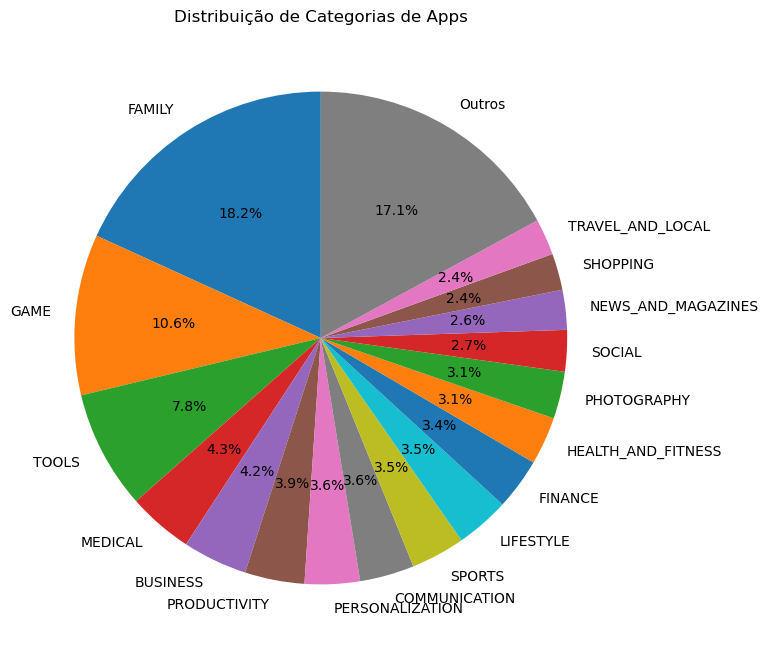

In [62]:
plt.figure(figsize=(8, 8))
plt.pie(categorias_acima_limite, labels=categorias_acima_limite.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Categorias de Apps')
plt.savefig('grafico_pizza_top_categorias.pdf', format='pdf', bbox_inches='tight')
plt.show()

### App mais caro existente no Dataset

In [67]:
# Fazendo o tratamento dos dados da coluna Price
precos_float = df['Price'].str.replace('$', '').replace('Everyone', '0').astype(float)
# Pegando o primeiro indice gerado
app_mais_caro = df.loc[precos_float.nlargest(1).index]
app_mais_caro[['App', 'Price']]

,App,Price
4367,I'm Rich - Trump Edition,$400.00


### Contando quantos apps têm a classificação "Mature 17+"

In [26]:
#Soma das linhas iguais a Mature 17+
classificacao = (df['Content Rating'] == 'Mature 17+').sum()
print("Total de apps encontrados com a Classificação Mature +17: ")
classificacao

Total de apps encontrados com a Classificação Mature +17: 


393

### Top 10 apps por número de reviews

In [25]:
# Convertendo a coluna 'Reviews' para numérico (inteiros)
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
# Ordenando os apps pelo número de reviews em ordem decrescente e selecionar os 10 primeiros
top_10_apps = df[['App', 'Reviews']].sort_values(by='Reviews', ascending=False).head(10)
top_10_apps

,App,Reviews
2544,Facebook,78158306.0
336,WhatsApp Messenger,69119316.0
2545,Instagram,66577313.0
335,Messenger – Text and Video Chat for Free,56642847.0
1670,Clash of Clans,44891723.0
4005,Clean Master- Space Cleaner & Antivirus,42916526.0
1654,Subway Surfers,27722264.0
3665,YouTube,25655305.0
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999.0
1660,Clash Royale,23133508.0


### Exemplos de calculos possiveis com o Dataset

In [30]:
# Média de Preço dos Apps por Categoria 
preco_tratado = df['Price'].str.replace('$', '').str.replace('Everyone', '0').str.replace(',', '')
preco_tratado = pd.to_numeric(preco_tratado, errors='coerce')
df['Price_float'] = preco_tratado
media_preco_por_categoria = df.groupby('Category')['Price_float'].mean().sort_index()
media_preco_por_categoria

Category
1.9                    0.000000
ART_AND_DESIGN         0.093281
AUTO_AND_VEHICLES      0.158471
BEAUTY                 0.000000
BOOKS_AND_REFERENCE    0.539505
BUSINESS               0.417357
COMICS                 0.000000
COMMUNICATION          0.263937
DATING                 0.160468
EDUCATION              0.150924
ENTERTAINMENT          0.078235
EVENTS                 1.718594
FAMILY                 1.309967
FINANCE                8.408203
FOOD_AND_DRINK         0.075714
GAME                   0.296465
HEALTH_AND_FITNESS     0.223438
HOUSE_AND_HOME         0.000000
LIBRARIES_AND_DEMO     0.011786
LIFESTYLE              6.398022
MAPS_AND_NAVIGATION    0.205725
MEDICAL                2.520759
NEWS_AND_MAGAZINES     0.015669
PARENTING              0.159667
PERSONALIZATION        0.400213
PHOTOGRAPHY            0.420925
PRODUCTIVITY           0.670936
SHOPPING               0.027129
SOCIAL                 0.066820
SPORTS                 0.307692
TOOLS                  0.323156

In [29]:
# Numero total de apps por categoria
total_apps_por_categoria = df['Category'].value_counts()
print("Número Total de Apps por Categoria:")
print(total_apps_por_categoria)

Número Total de Apps por Categoria:
Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
ART_AND_DESIGN           64
EVENTS                   64
PARENTING                60
COMICS                   56
BEAUTY                   53
1.9                       1
Nam

In [70]:
# Media de preço dos apps
preco_tratado = df['Price'].str.replace('$', '').replace('Everyone', '0').astype(float)
media_preco = preco_tratado.mean()
print("\nMédia de Preço dos Apps:")
print(media_preco)


Média de Preço dos Apps:
1.0272733142699015


In [36]:
# App pago mais barato do Dataset
# Fazendo o tratamento da coluna Price e separando os que são gratuitos (=0)
precos_float = df['Price'].str.replace('$', '').replace('Everyone', '0').str.replace(',', '')
precos_float = pd.to_numeric(precos_float, errors='coerce')
precos_float = precos_float[precos_float > 0]
# Condição para exibir informações do App
if not precos_float.empty:
    app_mais_barato = df.loc[precos_float.nsmallest(1).index]
    print("App mais barato presente no Dataset:")
    print(app_mais_barato[['App', 'Price']])
    preco_mais_barato = precos_float.nsmallest(1).values[0]
    print(f"Preço do App pago mais barato: ${preco_mais_barato:.2f}")
# Condição caso os dados do Dataset não tivessem apps pagos
else:
    print("Não há aplicativos com preço diferente de zero.")


App mais barato presente no Dataset:
                       App  Price
2171  All-in-One Mahjong 3  $0.99
Preço do App pago mais barato: $0.99


## - Gráficos com os dados do DataFrame

## Gráfico de dispersão

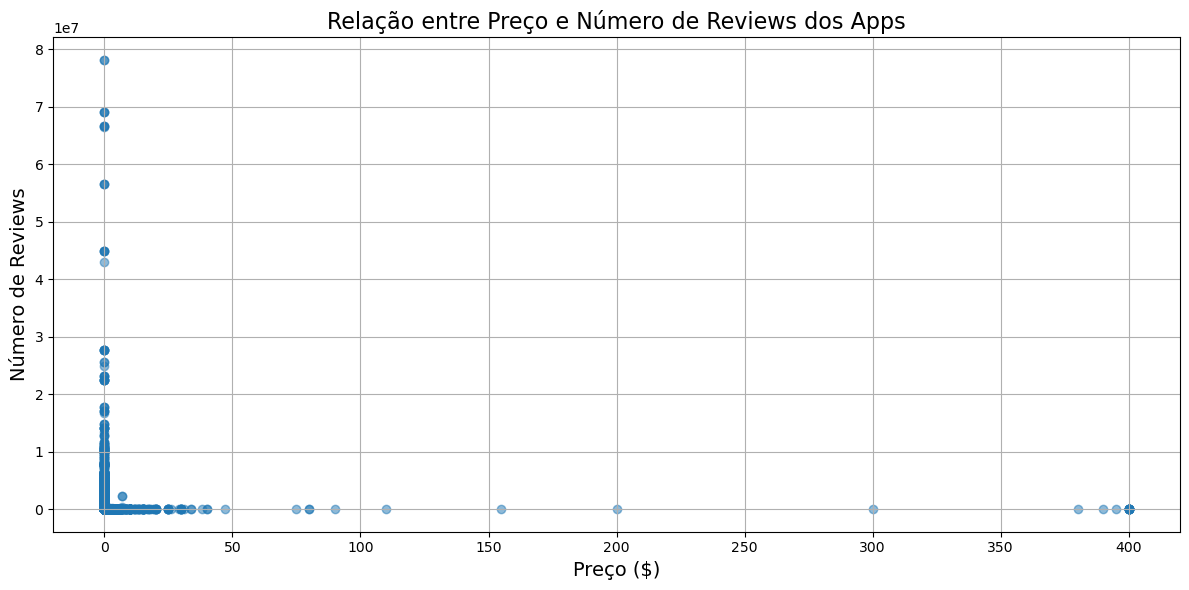

In [39]:
# Preço por número de reviews
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
plt.figure(figsize=(12, 6))
plt.scatter(df['Price'].str.replace('$', '').replace('Everyone', '0').astype(float), df['Reviews'], alpha=0.5)
plt.title('Relação entre Preço e Número de Reviews dos Apps', fontsize=16)
plt.xlabel('Preço ($)', fontsize=14)
plt.ylabel('Número de Reviews', fontsize=14)
plt.grid()
plt.tight_layout()
plt.savefig('grafico_dispersao.pdf', format='pdf', bbox_inches='tight')
plt.show()

## Gráfico de linhas

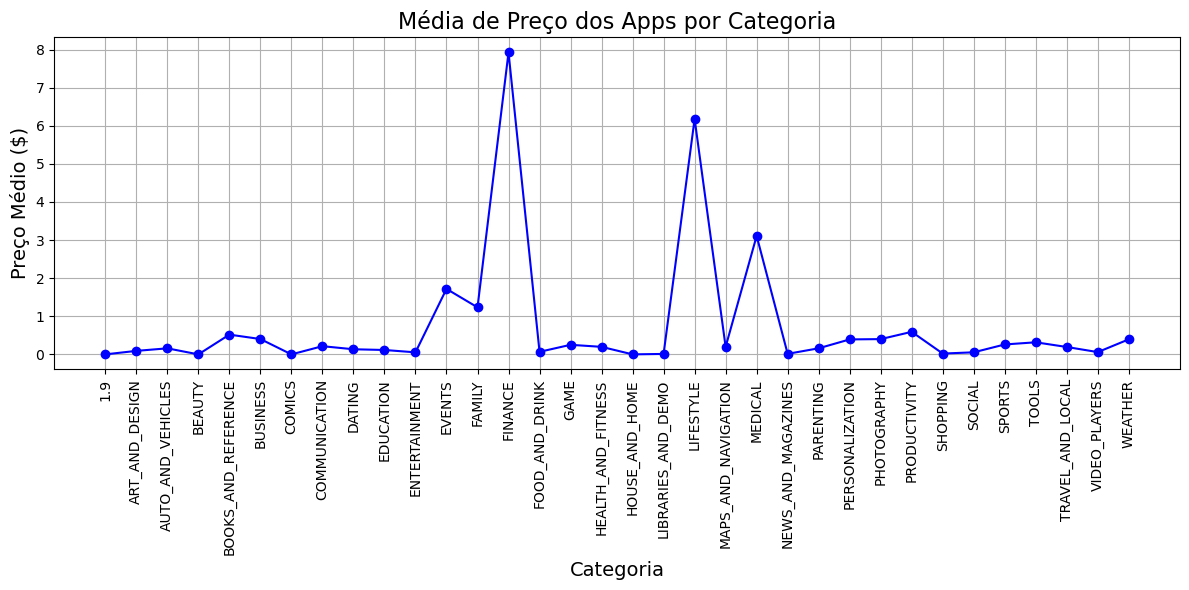

In [41]:
# Média de Preço dos Apps por Categoria 
# Fazendo tratamento dos dados da Coluna Price para utilizar novamente
preco_tratado = df['Price'].str.replace('$', '').str.replace('Everyone', '0').str.replace(',', '')
preco_tratado = pd.to_numeric(preco_tratado, errors='coerce')
df['Price_float'] = preco_tratado
# Calculando a média de preço por categoria
media_preco_por_categoria = df.groupby('Category')['Price_float'].mean().sort_index()

# Gráfico de Linhas
plt.figure(figsize=(12, 6))
plt.plot(media_preco_por_categoria.index, media_preco_por_categoria, marker='o', linestyle='-', color='blue')
plt.title('Média de Preço dos Apps por Categoria', fontsize=16)
plt.xlabel('Categoria', fontsize=14)
plt.ylabel('Preço Médio ($)', fontsize=14)
plt.xticks(rotation=90, ha= 'center')
plt.grid()
plt.tight_layout()
plt.savefig('grafico_de_linhas.pdf', format='pdf', bbox_inches='tight')
plt.show()
